# Ecuación de difusión del calor 1D

Discutiremos la solución de la ecuación de difusión del calor unidimensional, 

$$
\alpha \frac{\partial^2 \psi}{\partial^2 x}-\frac{\partial \psi}{\partial t}=0,
$$

en el dominio $-\infty<x<\infty$, $t\ge 0$, empleando la transformada de Fourier espacial, y la condición de borde/inicial

\begin{align}
\lim_{x \rightarrow \pm \infty}\psi(x,t)=0,\qquad
\psi(x,0)=\phi(x),
\end{align}

## Ejemplo 1: Perfil inicial Delta de Dirac

Primero consideraremos la solución simple que se encuentra en el caso que el perfil inicial de temperatura corresponde a una Delta de Dirac, 

$$
\phi(x)=\lambda\, \delta(x),
$$
en cuyo caso

$$
\psi_1(x,t)=\frac{\lambda}{2\sqrt{\pi \alpha t}}e^{-\frac{x^2}{4 \alpha t}},\qquad  t>0.
$$

In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('classic')

Definimos una función para evaluar nuestra solución

In [2]:
def Psi1(x,t,alpha):       
    return (1/(2*sqrt(pi*alpha*t)))*exp(-x**2/(4.*alpha*t))

Y otra función que la grafica, para valor de $t$ y $\alpha$ dados:

In [3]:
x = linspace(-50,50,1000)
def g1(t,alpha):
    plt.plot(x,Psi1(x,t,alpha), label='$\psi(x,%d)$' %t)
    plt.xlim(-50,50)
    plt.ylim(0,Psi1(0,0.1,alpha))
    plt.grid(True)
    plt.xlabel('$x$',fontsize=15)
    plt.ylabel('$\psi(x,t)$',fontsize=15)
    plt.title('Difusión del calor $1D$, $\phi(x)=\delta(x)$, $t=%.1f$' %t)
    plt.legend()

Por ejemplo, podemos graficar la solución para $t=0.01$ y $\alpha=1$

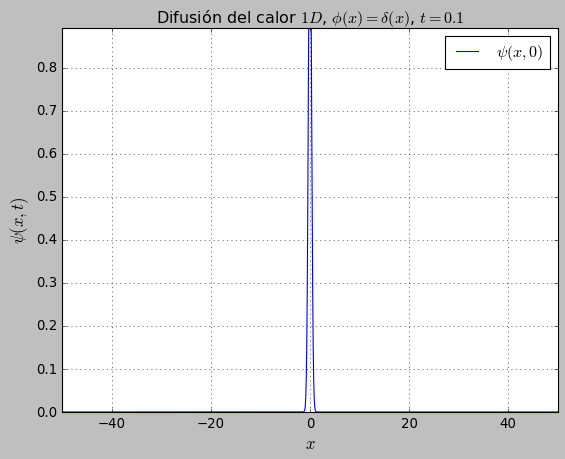

In [4]:
g1(0.05,1)

Graficamos ahora en forma interactiva

In [5]:
interact(g1,t=(0.1,50,0.1),alpha=(0.1,10,0.1))

interactive(children=(FloatSlider(value=25.000000000000004, description='t', max=50.0, min=0.1), FloatSlider(v…

<function __main__.g1(t, alpha)>

## Ejemplo 2: Perfil inicial escalonado

Si ahora consideramos

$$
\phi(x)=\left\lbrace\begin{array}{ll} T_0, & x\in(-a,a) \\ 0, & \text{otro caso} \end{array}\right.
$$
entonces la solución es de la forma

$$
\Psi_2(x,t) = \frac{T_0}{2}\left[erf\left(\frac{x+a}{\sqrt{4\alpha t}}\right) +erf\left(\frac{a-x}{\sqrt{4\alpha t}}\right)\right],
$$
donde $erf(x)$ denota la función error, definida por

$$
erf(x):= \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2}\,dt.
$$

Esta función está predefinida en el módulo `scipy.special`, que podemos entonces importar

In [6]:
from scipy.special import erf

Con esto, la solución es de la forma (consideramos $a=1$, $T_0=1$ y $\alpha=0.01$)

In [7]:
a = 1
alpha = 0.01
def Psi2(x,t):
    return (erf((x+a)/(sqrt(4*alpha*t))) + erf((a-x)/(sqrt(4*alpha*t))))/2.

Realizamos los gráficos en forma similar al primer caso:

In [8]:
x = linspace(-5,5,1000)
def g2(t):
    plt.plot(x,Psi2(x,t),label='$\psi(x,%d)$' %t)
    plt.title('Difusión del calor $1D$')
    plt.xlim(-5,5)
    plt.ylim(0,1.2)
    plt.grid(True)
    plt.xlabel('$x$',fontsize=15)
    plt.ylabel('$\psi(x,t)$',fontsize=15)
    plt.legend()

In [9]:
interact(g2, t=(0,50,0.1))

interactive(children=(FloatSlider(value=25.0, description='t', max=50.0), Output()), _dom_classes=('widget-int…

<function __main__.g2(t)>

## Exportando animaciones a archivos .gif

Es posible crear una animación de la solución usando la función `FuncAnimation`. El código siguiente genera el archivo `difusion-calor-1D-Delta.gif` con la animación de la primera solución:

In [10]:
from matplotlib.animation import FuncAnimation

No handles with labels found to put in legend.
/home/gr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/gr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/gr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


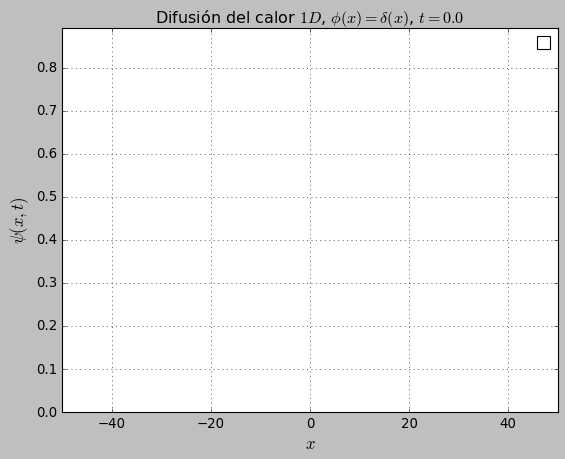

In [11]:
alpha = 1
t = 0.01
x = linspace(-50,50,1000)

fig, ax = plt.subplots()
ax.set_ylim(0, Psi1(0,0.1,alpha))
ax.grid()
ax.set_xlim(-50,50)
ax.set_xlabel('$x$',fontsize=15)
ax.set_ylabel('$\psi(x,t)$',fontsize=15)
ax.legend()

line = ax.plot(x, Psi1(x,t,alpha), lw=2)[0]
title = ax.set_title('Difusión del calor $1D$, $\phi(x)=\delta(x)$, $t=%.1f$' %t)

def animate(i):
    t = 1.*i
    ax.set_title('Difusión del calor $1D$, $\phi(x)=\delta(x)$, $t=%.1f$' %t)
    line.set_ydata(Psi1(x,t,alpha))
    
anim = FuncAnimation(fig, animate, interval=100, frames=150) #100 msec entre frames

anim.save('difusion-calor-1D-Delta.gif', writer='imagemagick')

Análogamente, para la segunda solución, creamos el archivo `difusion-calor-1D-escalon.gif`:

No handles with labels found to put in legend.
/home/gr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/gr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


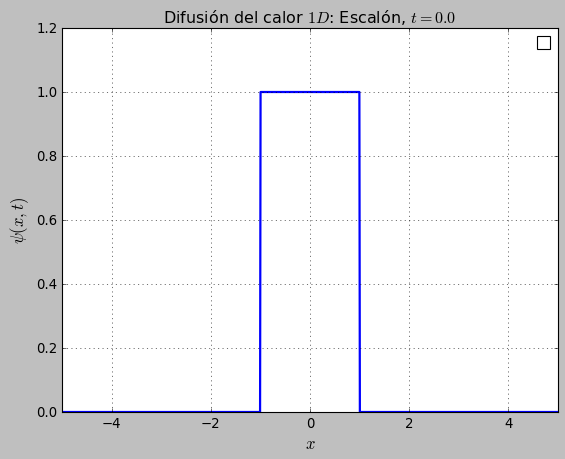

In [12]:
x = linspace(-5,5,1000)

fig, ax = plt.subplots()
ax.set_ylim(0,1.2)
ax.grid()
ax.set_xlim(-5,5)
ax.set_xlabel('$x$',fontsize=15)
ax.set_ylabel("$\psi(x,t)$",fontsize=15)
ax.legend()

line = ax.plot(x, Psi2(x,0), lw=2)[0]

def animate(i):
    t = 0.2*i
    ax.set_title('Difusión del calor $1D$: Escalón, $t=%.1f$' %t)
    line.set_ydata(Psi2(x,t))
    
anim = FuncAnimation(fig, animate, interval=100, frames=200) #100 msec entre frames

anim.save('difusion-calor-1D-Escalon.gif', writer='imagemagick')

Otra forma interesante de representar la solución es por medio de un gráfico de colores:

/home/gr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/gr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


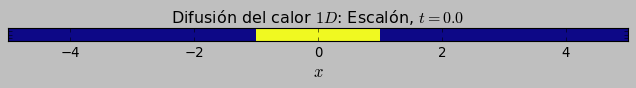

In [13]:
fig = plt.figure(figsize=(10,0.2))
ax = plt.subplot()
ax.set_xlim(-5,5)
ax.set_xlabel(r'$x$',fontsize=15)
ax.set_yticklabels([])

x = linspace(-5,5,1000)
y = linspace(0,0.2,2)
X,Y = meshgrid(x,y)
Z = Psi2(X,0)

cax = ax.pcolormesh(X, Y, Z, cmap='plasma')

def animate(i):
    t = 0.05*i
    ax.set_title('Difusión del calor $1D$: Escalón, $t=%.1f$' %t)
    cax.set_array(Psi2(X,t).flatten())
    
anim = FuncAnimation(fig, animate, interval=50, frames=100) #100 msec entre frames=10fps

anim.save('difusion-calor-1D-escalon-colores.gif', writer='imagemagick')